1. Fit the target using Linear Regression (LR) 

Download Libs

In [60]:
%pip install numpy
%pip install -U scikit-learn
%pip install torch
%pip install tensorflow
%pip install matplotlib
%pip install sklearn
%pip install torchmetrics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Import Libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve
import tensorflow as tf

Generate a sizeable  tabular dataset with 10 features, 1 regression target, 150 000 rows 

In [2]:
num_features = 10
regression_target = 1
num_samples = 150000

Split dataset into train and test sets

In [3]:
X, y = make_friedman1(n_samples=num_samples, n_features=num_features, noise=0.17, random_state=34)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34)


Fit Linear Regression model

In [4]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Calculate baseline MSE and R2 score

In [5]:
baseline_mse = mean_squared_error(y_test, lr_model.predict(X_test))
print("Baseline MSE:", baseline_mse)

baseline_r2 = r2_score(y_test, lr_model.predict(X_test))
print("Baseline R-squared (R2) Score:", baseline_r2)

Baseline MSE: 5.9499298378264225
Baseline R-squared (R2) Score: 0.7496211906321544


Define configurations for DNNs

In [6]:
hidden_layers_list = [1, 5, 25]
optimizers_list = ['sgd', 'adam']                   # RMSProp does not work, fix...
learning_rates_list = [0.1, 0.01, 0.001]
epochs = 100

Function to fit DNN with given configuration and plot learning curves

In [8]:
def fit_and_plot_dnn(hidden_layers, optimizer, learning_rate):
    dnn_model = MLPRegressor(hidden_layer_sizes=(hidden_layers,), solver=optimizer, learning_rate_init=learning_rate, max_iter=epochs, random_state=34)
    dnn_model.fit(X_train, y_train)

    # Calculate metrics
    dnn_mse = mean_squared_error(y_test, dnn_model.predict(X_test))
    dnn_r2 = r2_score(y_test, dnn_model.predict(X_test))
    dnn_mape = mean_absolute_percentage_error(y_test, dnn_model.predict(X_test))

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(dnn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Train')
    plt.plot(train_sizes, test_scores_mean, label='Test')
    plt.xlabel('Training Samples')
    plt.ylabel('Negative Mean Squared Error')
    plt.title(f'DNN {hidden_layers} hidden layers, {optimizer.upper()}, LR = {learning_rate}')
    plt.legend()
    plt.grid()
    plt.show()

    print(f"DNN MSE: {dnn_mse}\nDNN R-squared (R2) Score: {dnn_r2}\nDNN MAPE: {dnn_mape}")


Fit and plot DNNs for all configurations

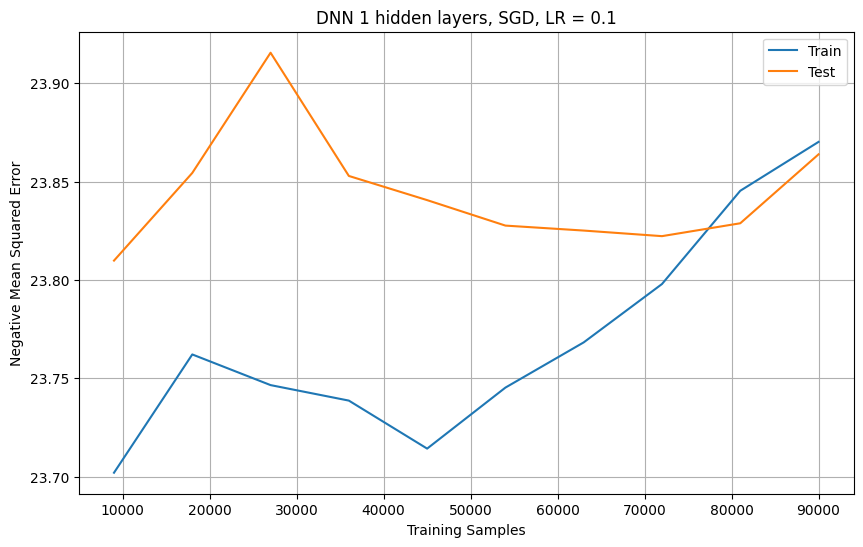

DNN MSE: 23.888675296586726
DNN R-squared (R2) Score: -0.005258589791952817
DNN MAPE: 0.3690974893833041


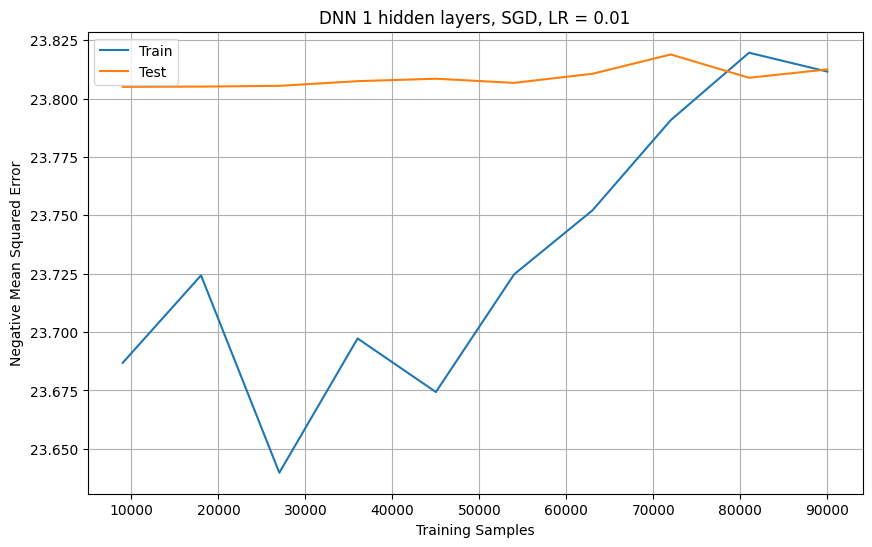

DNN MSE: 23.766284626300763
DNN R-squared (R2) Score: -0.00010827186566175762
DNN MAPE: 0.3790885867644574


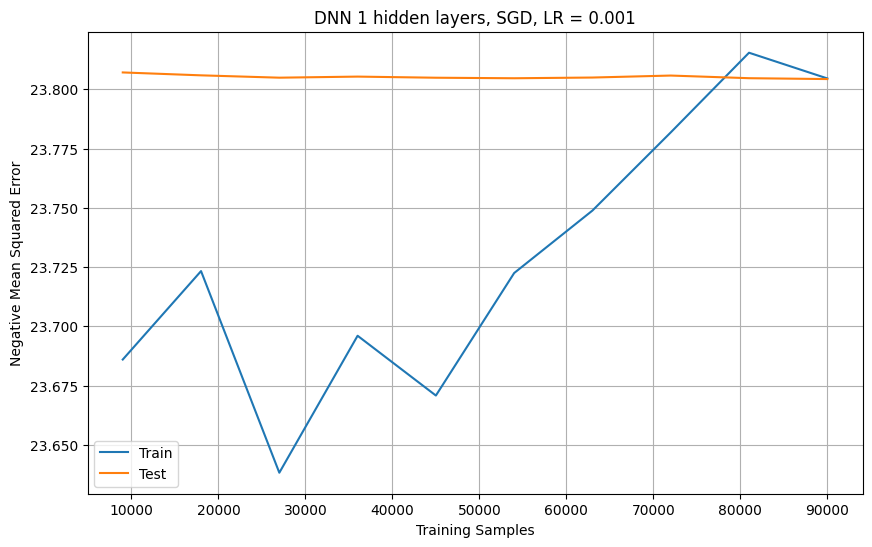

DNN MSE: 23.76448396854919
DNN R-squared (R2) Score: -3.2498443754747086e-05
DNN MAPE: 0.3784751667090391


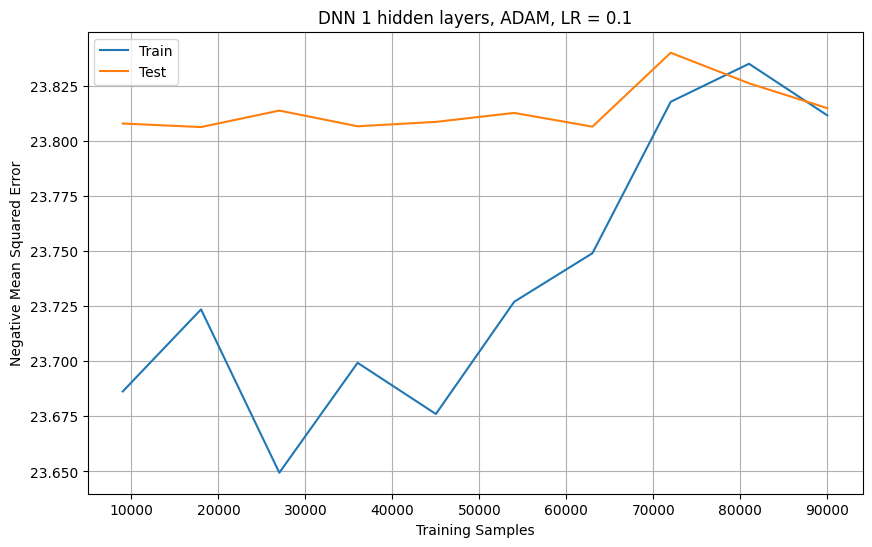

DNN MSE: 23.77472956882255
DNN R-squared (R2) Score: -0.0004636432248905642
DNN MAPE: 0.38056319278539397


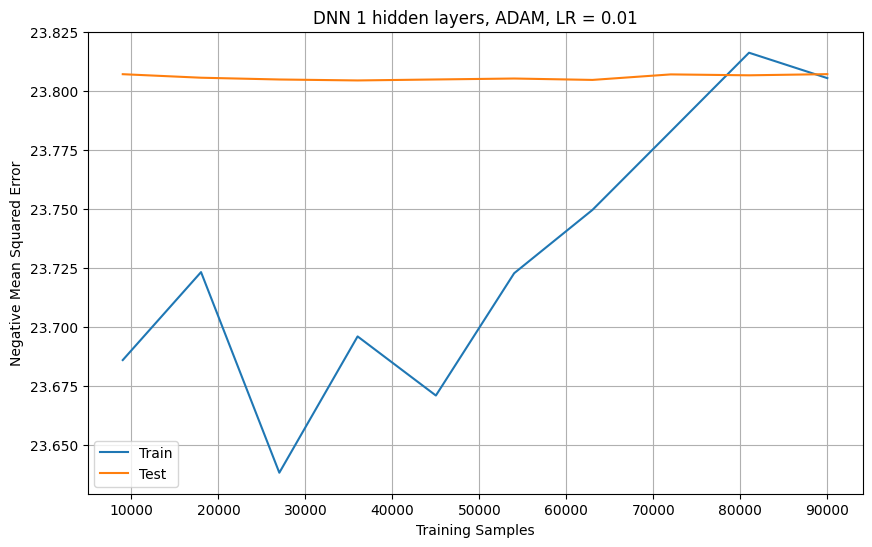

DNN MSE: 23.76898854626627
DNN R-squared (R2) Score: -0.00022205543623199375
DNN MAPE: 0.37968108656227656


c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

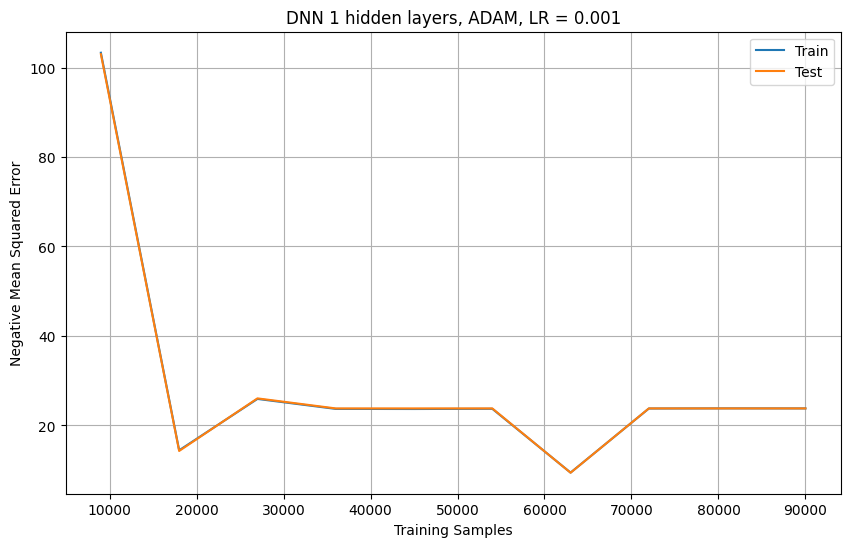

DNN MSE: 23.764016724574002
DNN R-squared (R2) Score: -1.2836364809309941e-05
DNN MAPE: 0.3782029581876744


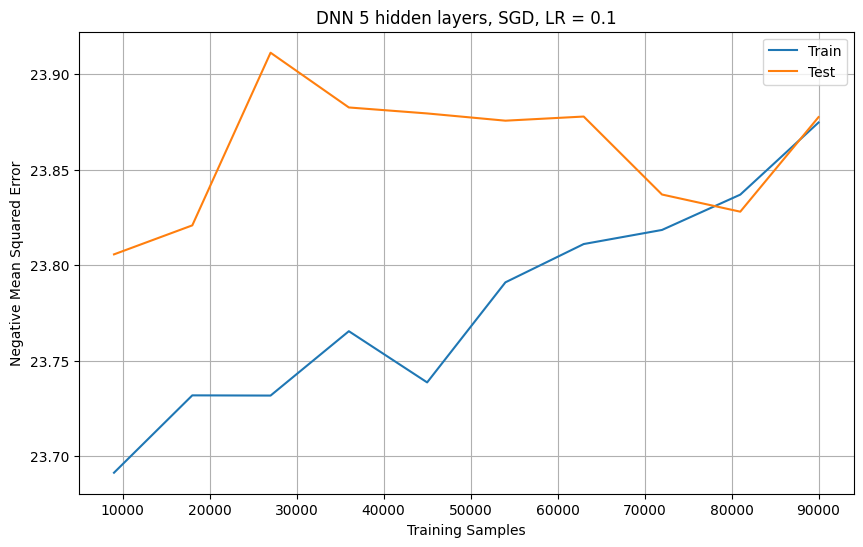

DNN MSE: 23.784610041068156
DNN R-squared (R2) Score: -0.0008794230650357449
DNN MAPE: 0.3740473318320409


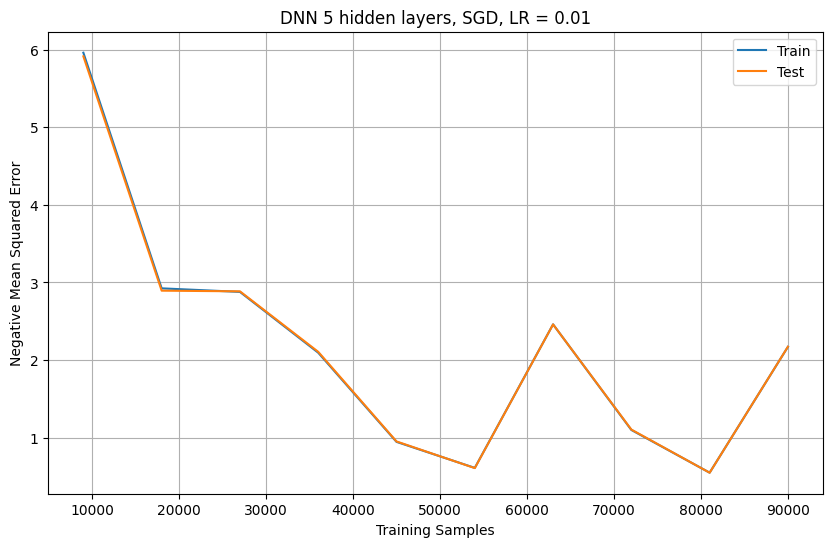

DNN MSE: 0.7167175368619049
DNN R-squared (R2) Score: 0.9698398319940367
DNN MAPE: 0.05669995851411421


c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

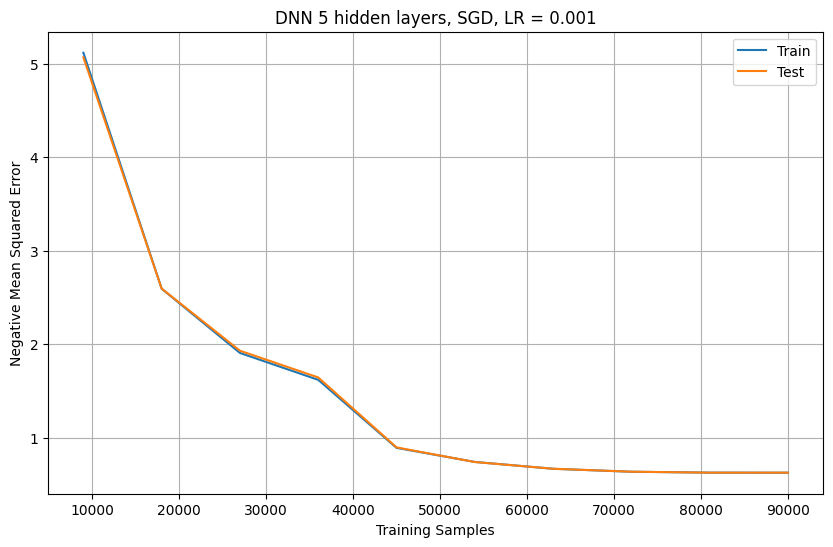

DNN MSE: 0.6121103376451368
DNN R-squared (R2) Score: 0.9742418042365812
DNN MAPE: 0.051303604561168815


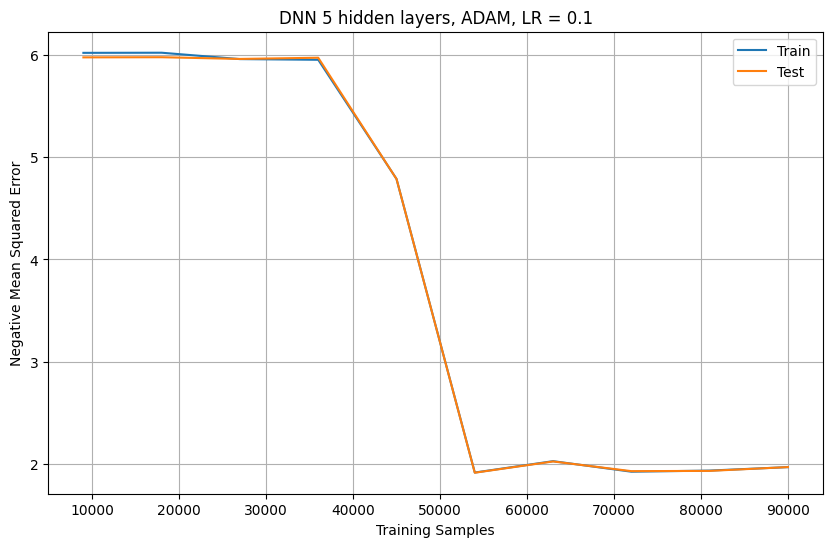

DNN MSE: 2.0397412516350704
DNN R-squared (R2) Score: 0.9141657128868875
DNN MAPE: 0.09783789210438734


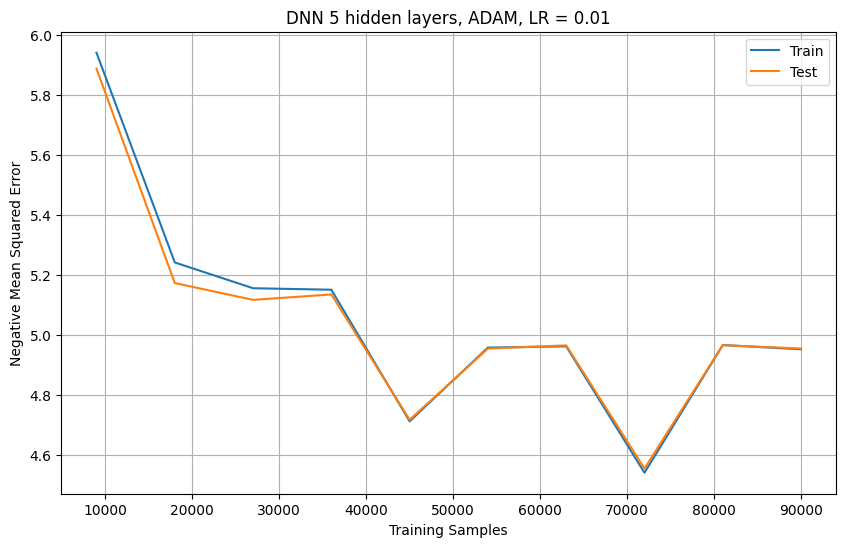

DNN MSE: 4.977825042952206
DNN R-squared (R2) Score: 0.790528301767148
DNN MAPE: 0.13958466718239185


c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

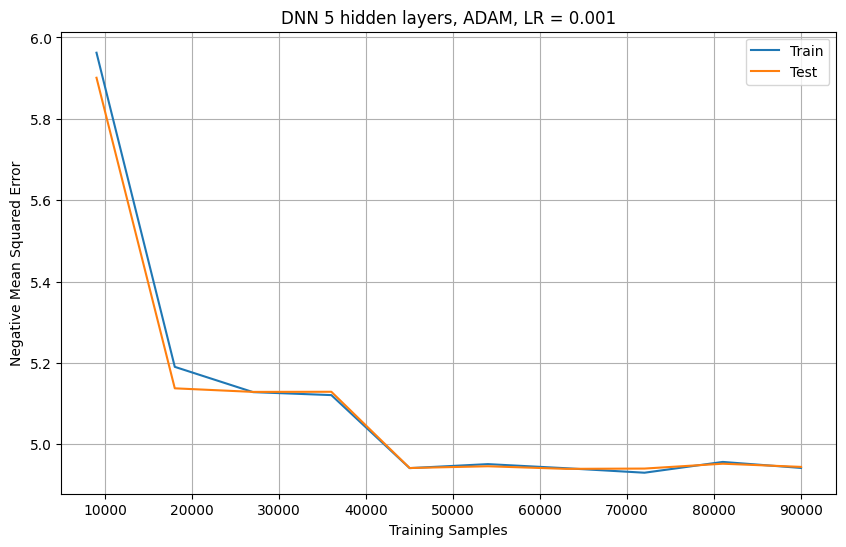

DNN MSE: 5.016785340406895
DNN R-squared (R2) Score: 0.788888814721888
DNN MAPE: 0.14246838185552912


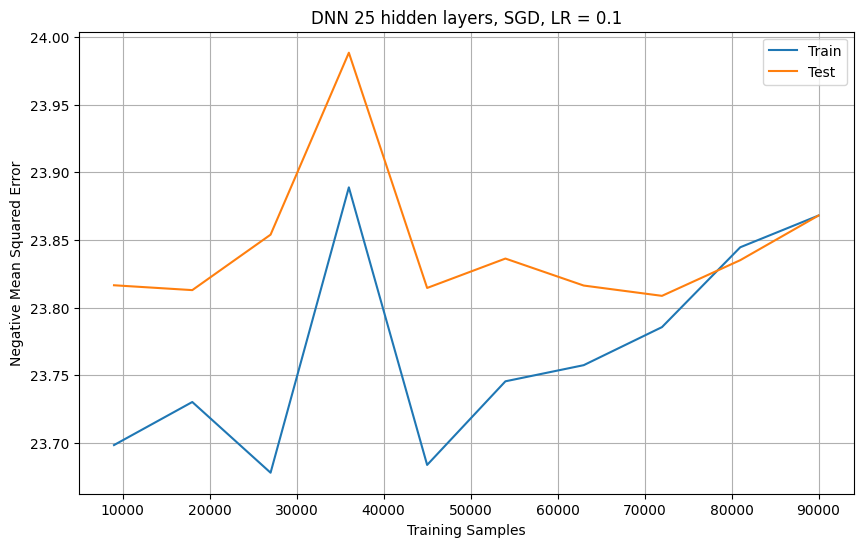

DNN MSE: 23.765378566732938
DNN R-squared (R2) Score: -7.01440016377397e-05
DNN MAPE: 0.37882463499088126


c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

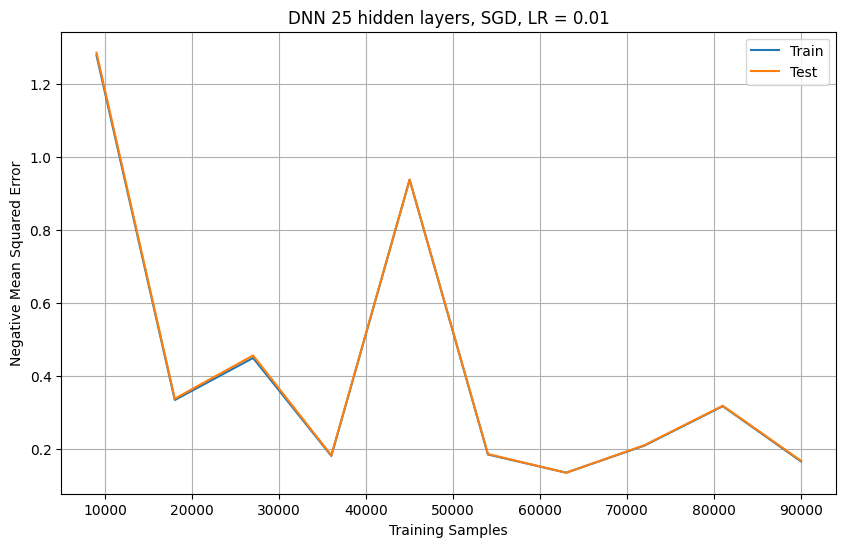

DNN MSE: 0.15414850342505326
DNN R-squared (R2) Score: 0.9935132817015705
DNN MAPE: 0.023304602505439972


c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

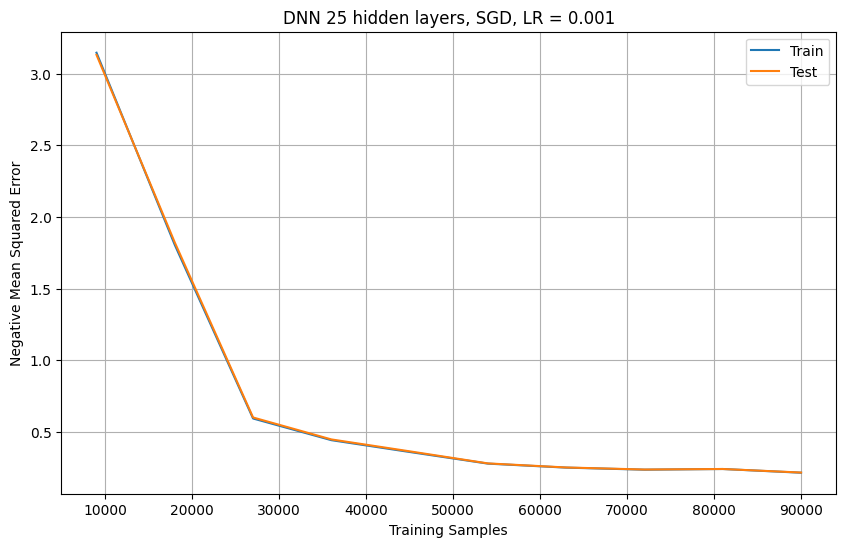

DNN MSE: 0.19510140058628342
DNN R-squared (R2) Score: 0.9917899441310659
DNN MAPE: 0.029595975433871123


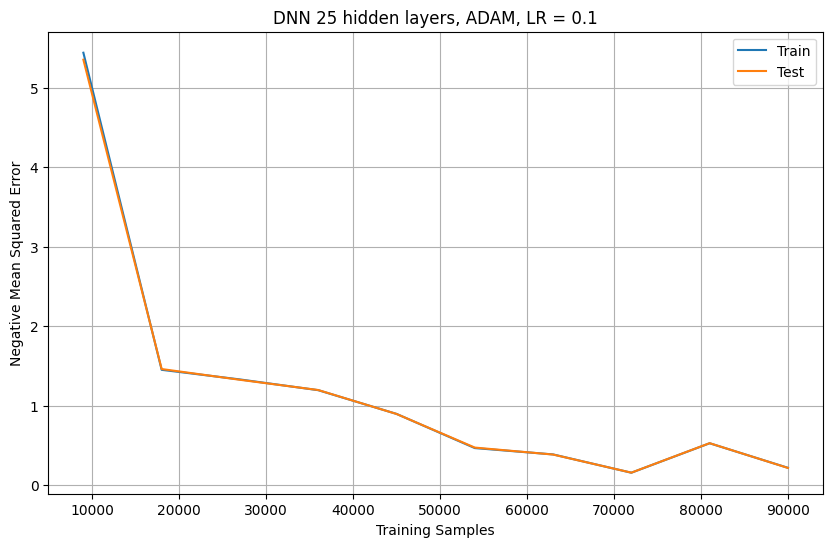

DNN MSE: 0.1262271171549593
DNN R-squared (R2) Score: 0.9946882406743237
DNN MAPE: 0.022971713630394734


c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

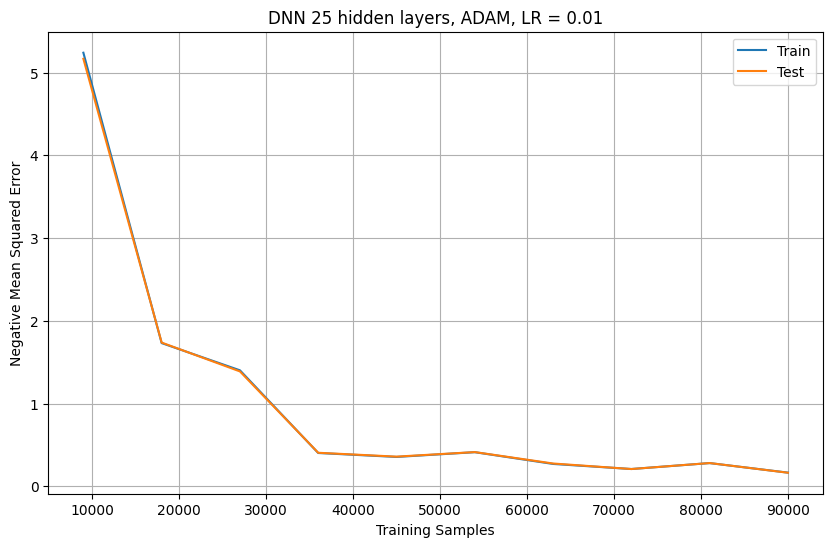

DNN MSE: 0.1544395856553483
DNN R-squared (R2) Score: 0.9935010326794416
DNN MAPE: 0.0237992319756229


c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ghotu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

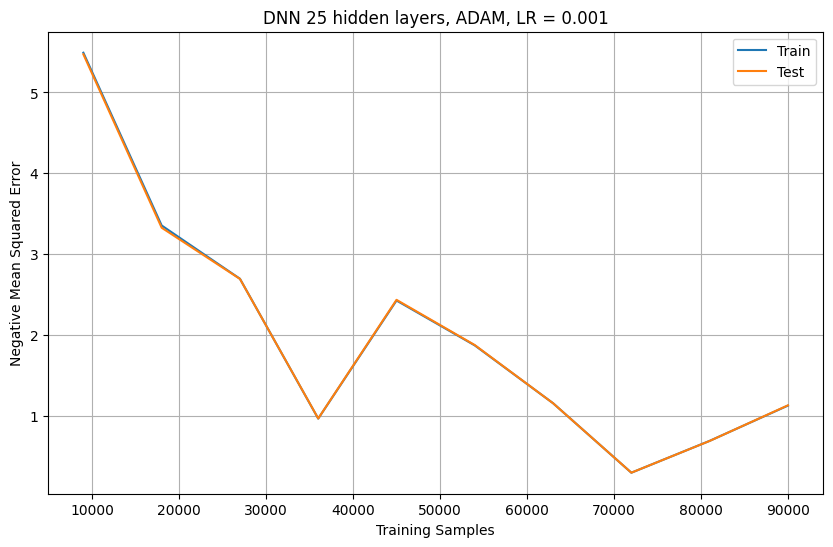

DNN MSE: 0.3059119127549064
DNN R-squared (R2) Score: 0.9871269304723441
DNN MAPE: 0.03727105447026251


In [9]:
for hidden_layers in hidden_layers_list:
    for optimizer in optimizers_list:
        for learning_rate in learning_rates_list:
            fit_and_plot_dnn(hidden_layers, optimizer, learning_rate)

1. What models and combinations of hyper-parameters worked best? Why?
2. Influence of optimizer?
3. Influence of learning rate?
4. Influence of DNN architecture (number of layers)?
5. Influence of data distribution (linear or non-linear?)

1. Models with the lowest MSE values, the highest R2 values, and the lowest MAPE values ​​can be considered to perform best.

2. The influence of the optimizer can be evaluated by changes in MSE, R2 and MAPE metrics when using different optimizers (eg 'sgd', 'adam'). The optimizer that shows the best results (lower MSE, higher R2, lower MAPE) can be considered more efficient.

3. The influence of the learning rate can also be evaluated based on changes in the MSE, R2, and MAPE metrics when using different learning rate values ​​(for example, 0.1, 0.01, 0.001). The optimal value of the learning rate will be the one that results in the smallest values ​​of MSE and MAPE and the highest R2.

4. The performance of a DNN architecture (number of layers) can be evaluated by comparing the MSE, R2 and MAPE metrics for different numbers of hidden layers (hidden layers), for example 1, 5, 25. The best architecture will be the one that gives the lowest MSE and MAPE values ​​and the highest value R2.

5. The influence of data distribution (linear or non-linear) can be determined by comparing MSE, R2 and MAPE metrics for different data types. If models on linear data show better results (smaller MSE and MAPE, larger R2) than on non-linear data, then it can be said that the model works better on linear data.